### Example 1 
#### The method is an iterative process to repeatedly test different breaks in the dataset to determine which set of breaks has the smallest in-class variance. 
#### conda install -c conda-forge jenkspy


<class 'numpy.ndarray'>
2
(40, 46)
1840
[-9999. -9999. -9999. ... -9999. -9999. -9999.]
1
(1840,)
1840
[-9999.0, -9999.0, 87.0, 154.0, 206.0, 268.0, 355.0, 443.0, 542.0, 695.0, 797.0, 912.0, 1005.0, 1121.0, 1325.0, 1439.0, 1590.0, 2125.0, 2258.0, 2430.0, 2646.0, 2826.0, 3053.0, 3179.0, 3311.0, 3573.0, 3788.0, 3944.0, 4035.0, 4329.0, 4513.0, 4686.0, 4868.0, 4973.0, 5133.0, 5259.0, 5376.0, 5517.0, 5702.0, 5814.0, 6000.0, 6156.0, 6395.0, 6617.0, 6719.0, 6859.0, 6957.0, 7109.0, 7222.0, 7307.0, 7527.0, 7685.0, 7778.0, 7949.0, 8126.0, 8239.0, 8352.0, 8499.0, 8615.0, 8802.0, 8955.0, 9084.0, 9194.0, 9321.0, 9403.0, 9488.0, 9581.0, 9712.0, 9774.0, 9956.0, 10071.0, 10174.0, 10248.0, 10363.0, 10443.0, 10506.0, 10657.0, 10818.0, 10897.0, 10999.0, 11103.0, 11241.0, 11356.0, 11446.0, 11519.0, 11641.0, 11743.0, 11916.0, 12070.0, 12211.0, 12334.0, 12453.0, 12561.0, 12650.0, 12808.0, 12939.0, 13058.0, 13187.0, 13296.0, 13391.0, 13527.0, 13684.0, 13834.0, 13987.0, 14144.0, 14282.0, 14388.0, 14505.0, 145

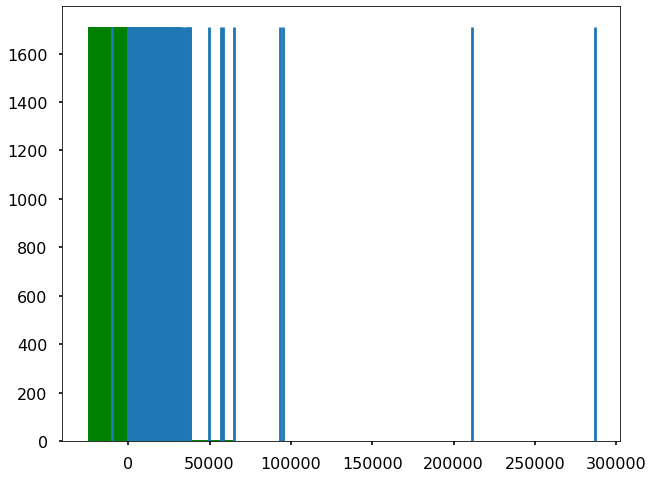

In [1]:
# TODO:- Determine the value for nb_class and bins

import json
import rasterio
from jenkspy import jenks
import jenkspy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline


# data should be 1-dimensional array, python list or iterable 
myArray  = np.loadtxt("rwa_population.asc", skiprows=6)
print (type(myArray)) 
print(myArray.ndim)
print(myArray.shape)
print(myArray.size)
array_1d = myArray.flatten()
print (array_1d)
print(array_1d.ndim)
print(array_1d.shape)
print(array_1d.size)

# calculate the breaks
breaks = jenkspy.jenks_breaks(array_1d, nb_class=200)
breaks
print (breaks)
print(len(breaks))
plt.figure(figsize = (10,8))
hist = plt.hist(array_1d, bins=10, align='left', color='g')
for b in breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

### Example 2
#### Generating Jenks classification breaks and using those breaks to reclassify raster data

In [2]:
import json
import rasterio
from jenkspy import jenks
import jenkspy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline


# data should be 1-dimensional array, python list or iterable 
myArray  = np.loadtxt("rwa_population.asc", skiprows=6)
print (type(myArray)) 
print(myArray.ndim)
print(myArray.shape)
print(myArray.size)
array_1d = myArray.flatten()
print (array_1d)
print(array_1d.ndim)
print(array_1d.shape)
print(array_1d.size)

<class 'numpy.ndarray'>
2
(40, 46)
1840
[-9999. -9999. -9999. ... -9999. -9999. -9999.]
1
(1840,)
1840


In [3]:
def getJenksBreaks(dataList, numClass):
    dataList.sort()
    mat1 = []
    for i in range(0,len(dataList)+1):
        temp = []
        for j in range(0,numClass+1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(0,len(dataList)+1):
        temp = []
        for j in range(0,numClass+1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1,numClass+1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2,len(dataList)+1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2,len(dataList)+1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1,l+1):
            i3 = l - m + 1
            val = float(dataList[i3-1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2,numClass+1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(dataList)
    kclass = []
    for i in range(0,numClass+1):
        kclass.append(0)
    kclass[numClass] = float(dataList[len(dataList) - 1])
    countNum = numClass
    while countNum >= 2:#print "rank = " + str(mat1[k][countNum])
        id = int((mat1[k][countNum]) - 2)
        #print "val = " + str(dataList[id])
        kclass[countNum - 1] = dataList[id]
        k = int((mat1[k][countNum] - 1))
        countNum -= 1
    return kclass

new = getJenksBreaks(array_1d,200)
print (new)

### used after running getJenksBreaks()
##def classify(value, breaks):
##  for i in range(1, len(breaks)):
##    if value < breaks[i]:
##      return i
##  return len(breaks) - 1

[0, -9999.0, 87.0, 154.0, 206.0, 268.0, 355.0, 443.0, 542.0, 695.0, 797.0, 912.0, 1005.0, 1121.0, 1325.0, 1439.0, 1590.0, 2125.0, 2258.0, 2430.0, 2646.0, 2826.0, 3053.0, 3179.0, 3311.0, 3573.0, 3788.0, 3944.0, 4035.0, 4329.0, 4513.0, 4686.0, 4868.0, 4973.0, 5133.0, 5259.0, 5376.0, 5517.0, 5702.0, 5814.0, 6000.0, 6156.0, 6395.0, 6617.0, 6719.0, 6859.0, 6957.0, 7109.0, 7222.0, 7307.0, 7527.0, 7685.0, 7778.0, 7949.0, 8126.0, 8239.0, 8352.0, 8499.0, 8615.0, 8802.0, 8955.0, 9084.0, 9194.0, 9321.0, 9403.0, 9488.0, 9581.0, 9712.0, 9774.0, 9956.0, 10071.0, 10174.0, 10248.0, 10363.0, 10443.0, 10506.0, 10657.0, 10818.0, 10897.0, 10999.0, 11103.0, 11241.0, 11356.0, 11446.0, 11519.0, 11641.0, 11743.0, 11916.0, 12070.0, 12211.0, 12334.0, 12453.0, 12561.0, 12650.0, 12808.0, 12939.0, 13058.0, 13187.0, 13296.0, 13391.0, 13527.0, 13684.0, 13834.0, 13987.0, 14144.0, 14282.0, 14388.0, 14505.0, 14589.0, 14717.0, 14826.0, 14900.0, 15008.0, 15087.0, 15239.0, 15382.0, 15577.0, 15806.0, 16020.0, 16155.0, 1626

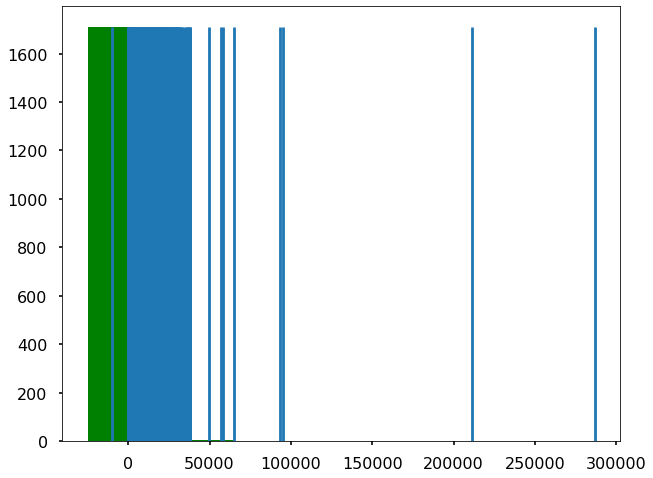

In [4]:
plt.figure(figsize = (10,8))
hist = plt.hist(array_1d, bins=10, align='left', color='g')
for b in new:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

In [5]:
def getGVF( dataList, numClass ):
    """The Goodness of Variance Fit (GVF) is found by taking the difference between the squared deviations from the array mean (SDAM) and the squared deviations from the class means (SDCM), and dividing by the SDAM"""
    breaks = getJenksBreaks(dataList, numClass)
    dataList.sort()
    listMean = sum(dataList)/len(dataList)
    print (listMean)
    SDAM = 0.0
    for i in range(0,len(dataList)):
        sqDev = (dataList[i] -listMean)**2
        SDAM += sqDev
    SDCM = 0.0
    for i in range(0,numClass):
            if breaks[i] == 0:
                classStart = 0
            else:
                classStart = dataList.index(breaks[i])
                classStart += 1
            classEnd = dataList.index(breaks[i+1])
            classList = dataList[classStart:classEnd+1]
            classMean = sum(classList)/len(classList)
            print (classMean)
            preSDCM = 0.0
            for j in range(0,len(classList)):
                sqDev2 = (classList[j] -classMean)**2
                preSDCM += sqDev2
            SDCM += preSDCM
    return (SDAM -SDCM)/SDAM


In [6]:
# new is the value computed from getJenksBreaks
newGVF = getGVF(new,200)
print (newGVF)

18409.885572139305
-9999.0
0.0
-3304.0
180.0
268.0
355.0
443.0
542.0
695.0
797.0
912.0
1005.0
1121.0
1325.0
1439.0
1590.0
2125.0
2258.0
2430.0
2646.0
2826.0
3053.0
3179.0
3311.0
3573.0
3788.0
3944.0
4035.0
4329.0
4513.0
4686.0
4868.0
4973.0
5133.0
5259.0
5376.0
5517.0
5702.0
5814.0
6000.0
6156.0
6395.0
6617.0
6719.0
6859.0
6957.0
7109.0
7222.0
7307.0
7527.0
7685.0
7778.0
7949.0
8126.0
8239.0
8352.0
8499.0
8615.0
8802.0
8955.0
9084.0
9194.0
9321.0
9403.0
9488.0
9581.0
9712.0
9774.0
9956.0
10071.0
10174.0
10248.0
10363.0
10443.0
10506.0
10657.0
10818.0
10897.0
10999.0
11103.0
11241.0
11356.0
11446.0
11519.0
11641.0
11743.0
11916.0
12070.0
12211.0
12334.0
12453.0
12561.0
12650.0
12808.0
12939.0
13058.0
13187.0
13296.0
13391.0
13527.0
13684.0
13834.0
13987.0
14144.0
14282.0
14388.0
14505.0
14589.0
14717.0
14826.0
14900.0
15008.0
15087.0
15239.0
15382.0
15577.0
15806.0
16020.0
16155.0
16268.0
16389.0
16518.0
16738.0
16940.0
17113.0
17361.0
17653.0
17768.0
17945.0
18085.0
18220.0
18319.0
185

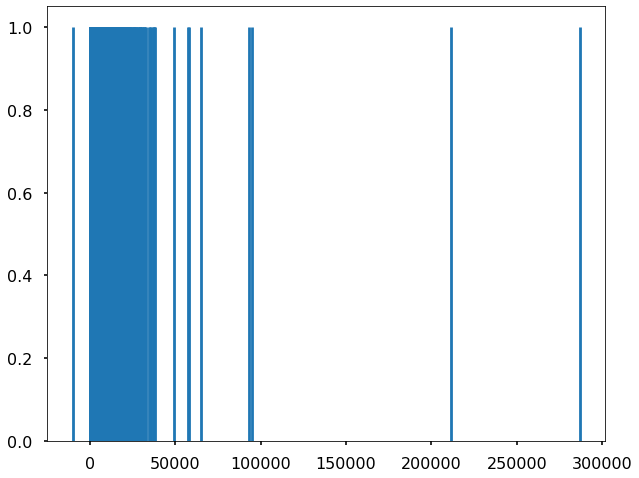

In [7]:
# TODO:- Check for correctness
plt.figure(figsize = (10,8))
hist = plt.hist(newGVF, bins=10, align='left', color='g')
for b in new:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

### Example 3
#### Jenks Natural Breaks works by optimizing the Goodness of Variance Fit, a value from 0 to 1 where 0 = No Fit and 1 = Perfect Fit. The key in selecting the number of classes is to find a balance between detecting differences and overfitting your data. To determine the optimum number of classes, use a threshold GVF value you desire and use the number of classes that satisfies this value first.

#### The function calculates the Goodness of Variance Fit given an array of values to classify and the number of classes selected

In [8]:
import json
import rasterio
from jenkspy import jenks
import jenkspy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline


# data should be 1-dimensional array, python list or iterable 
myArray  = np.loadtxt("rwa_population.asc", skiprows=6)
print (type(myArray)) 
print(myArray.ndim)
print(myArray.shape)
print(myArray.size)
array_1d = myArray.flatten()
print (array_1d)
print(array_1d.ndim)
print(array_1d.shape)
print(array_1d.size)

<class 'numpy.ndarray'>
2
(40, 46)
1840
[-9999. -9999. -9999. ... -9999. -9999. -9999.]
1
(1840,)
1840


In [9]:
from jenkspy import jenks
import numpy as np

def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1


In [10]:
GVF = goodness_of_variance_fit(array_1d,200)
print (GVF)

0.9914026983327585


C:\Users\pua66\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
C:\Users\pua66\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


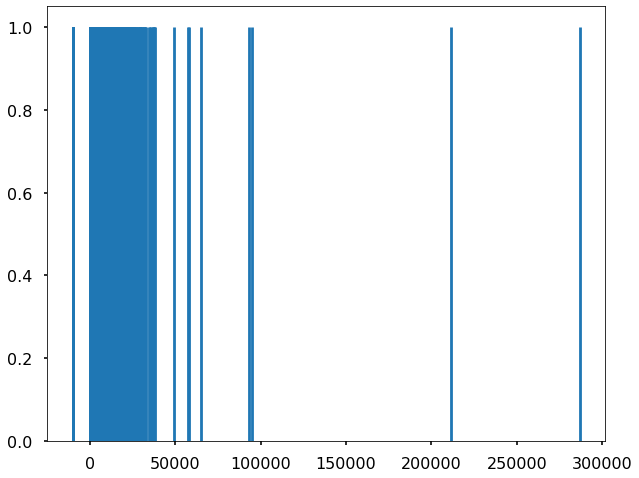

In [11]:
plt.figure(figsize = (10,8))
hist = plt.hist(GVF, bins=10, align='left', color='g')
for b in array_1d:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

#### Considering the GVF should be at least .8, then we can increment the number of classes until the GVF is satisfied

In [12]:
# TODO:- Decide value for GVF, nclasses, while loop
gvf = 0.0
nclasses = 200
while gvf < 0.8:
    gvf = goodness_of_variance_fit(array_1d, nclasses)
    nclasses += 1
print (gvf)

0.9914026983327585


C:\Users\pua66\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
